# Q1. SURNAME ANALYSIS


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('jkm_1.csv')
# new_df = df.sort_values(by= "VoterLastNameEn", ascending = True)
# new_df

# #new_df = df.loc[(df['VoterLastNameEn'] == 'PARMAR') | (df['VoterLastNameEn'] == 'Parmar') | (df['VoterLastNameEn'] == 'parmar')]



df['count'] = 1

# new_df = df.groupby(['VoterLastNameEn']).count()['count'].head(5)

Surname = df['RelationLastNameEn'].value_counts()
Surname



PATEL        7621
RABARI       6754
CHAUDHARI    5156
BHIL         4893
SOLANKI      2613
             ... 
lungartar       1
LUNGATRA        1
PAARADIYA       1
padariya        1
RABRAI          1
Name: RelationLastNameEn, Length: 1481, dtype: int64

In [233]:
# Percentage Distribution
Surname_percent=df['RelationLastNameEn'].value_counts(normalize=True)*100
Surname_percent

PATEL        8.433482
RABARI       7.474050
CHAUDHARI    5.705686
BHIL         5.414647
SOLANKI      2.891574
               ...   
lungartar    0.001107
LUNGATRA     0.001107
PAARADIYA    0.001107
padariya     0.001107
RABRAI       0.001107
Name: RelationLastNameEn, Length: 1481, dtype: float64

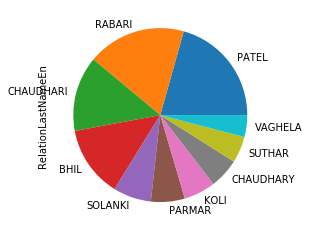

In [235]:
# PIE GRAPH FOR TOP 10 SURNAMES BY NUMBER

Surname_graph = df['RelationLastNameEn'].value_counts().head(10)

ax = Surname_graph.plot(kind='pie', y = 'Surname Analysis')


# Q2 Family Size Analysis

In [40]:
family_size = df.loc[:, ['PartNo', 'SectionNo','HouseNoEn', 'ContactNo']]
family_size
family = family_size.groupby (['PartNo', 'SectionNo', 'HouseNoEn']).agg({'HouseNoEn':['count']})
# family
family.columns=['familyMemberCount']
family = family.reset_index()
family

,PartNo,SectionNo,HouseNoEn,familyMemberCount
0,1,1,01-Feb,2
1,1,1,01-Jan,3
2,1,1,01-Nov,1
3,1,1,1,1
4,1,1,10,7
...,...,...,...,...
21235,100,7,96,12
21236,100,7,97,16
21237,100,7,૯૬,2
21238,100,8,98,5


# Q3 Family Head

In [240]:
family_heads = df.loc[:, ['PartNo', 'SectionNo','HouseNoEn','VoterFirstNameEn','VoterLastNameEn','Age']]
family_heads.head(4)

# family_head = family_heads.groupby(['PartNo','SectionNo','HouseNoEn']).agg({'Age':['max']})# (['VoterFirstNameEn'])
# family_head
# family_head.columns=['familyHead']
# family_head = family_head.reset_index()
# family_head

# head_df = df.groupby([df.PartNo,df.SectionNo,df.HouseNoEn]).apply(lambda df:df[df.Age==df.Age.max()])

head = family_heads.groupby(['PartNo', 'SectionNo', 'HouseNoEn']).apply(lambda df:df[df.Age==df.Age.max()])


head


PartNo  SectionNo HouseNoEn  \
PartNo SectionNo HouseNoEn                                      
1      1         01-Feb    4           1          1    01-Feb   
                 01-Jan    1           1          1    01-Jan   
                 01-Nov    6           1          1    01-Nov   
                 1         0           1          1         1   
                 10        46          1          1        10   
...                                  ...        ...       ...   
100    7         97        92510     100          7        97   
                 ૯૬        92504     100          7        ૯૬   
                           92505     100          7        ૯૬   
       8         98        92524     100          8        98   
       9         97        92529     100          9        97   

                                 VoterFirstNameEn VoterLastNameEn  Age  
PartNo SectionNo HouseNoEn                                              
1      1         01-Feb    4           ISHVARBHAI          PARMAR   38  
                 01-Jan    1            PUNMABHAI          PARMAR   68  
                 01-Nov    6            ASHOKBHAI          PANSAL   25  
                 1         0              MINABEN         THAKKAR   44  
                 10        46            HEDUBHAI          PANSAL   60  
...                                           ...             ...  ...  
100    7         97        92510         TRIJABEN         SOLANKI   81  
                 ૯૬        92504        ASHOKBHAI         SOLANKI   25  
                           92505        KIRANBHAI         SOLANKI   25  
       8         98        92524         RANGUBEN            KOLI   66  
       9         97        92529        TARUNBHAI         SOLANKI   34  

[21892 rows x 6 columns]

# Q4 Single Voters

In [48]:
# Number of Houses with One Family Member

single_family = family.groupby(['familyMemberCount']).apply(lambda df:df[df.familyMemberCount == 1])
#single_family.reset_index()

# #single_family['percentOfHouse'] = single_family(['HouseNoEn'] *100)

#single_family.columns = ['VoterFirstName']

single_family




PartNo  SectionNo HouseNoEn  familyMemberCount
familyMemberCount                                                      
1                 2           1          1    01-Nov                  1
                  3           1          1         1                  1
                  5           1          1       106                  1
                  6           1          1       109                  1
                  31          1          1        26                  1
...                         ...        ...       ...                ...
                  21222     100          5        ૮૪                  1
                  21223     100          5        ૮૫                  1
                  21224     100          5        ૮૭                  1
                  21225     100          5        ૮૯                  1
                  21232     100          7        87                  1

[6851 rows x 4 columns]

# Q5 First-time Voters - those voter whose age is 18 to 22 

In [3]:
firstTimerCount = df.groupby(['Age']).count()['count'].head(5)

firstTimerCount

Age
18    1033
19    1619
20    1942
21    2303
22    2333
Name: count, dtype: int64

In [4]:
firstTimer = df.loc[:, ['PartNo', 'SectionNo','HouseNoEn', 'VoterFirstNameEn', 'VoterLastNameEn', 'Age']]

firstTimer.groupby(['PartNo', 'SectionNo','Age']).apply(lambda df:df[df.Age<=22])

PartNo  SectionNo HouseNoEn VoterFirstNameEn  \
PartNo SectionNo Age                                                       
1      1         19  1303        1          1         8        PARASBHAI   
                 20  117         1          1    20-Feb       DEVGUNIBEN   
                     1306        1          1       348          napaben   
                 21  18          1          1    Apr-34      ARAVINDBHAI   
                     43          1          1         9      DEVARAJBHAI   
...                            ...        ...       ...              ...   
100    7         20  92507     100          7        96         KOMALBEN   
                     92523     100          7        97     CHANDRIKABEN   
                 21  92520     100          7        97        rasilaben   
                 22  92522     100          7        97       PRAVINBHAI   
       8         20  92526     100          8        98      VIRBHANBHAI   

                           VoterLastNameEn  Age  
PartNo SectionNo Age                             
1      1         19  1303           PANSAL   19  
                 20  117            PANSAL   20  
                     1306         majirana   20  
                 21  18             PANSAL   21  
                     43             PANSAL   21  
...                                    ...  ...  
100    7         20  92507         SOLANKI   20  
                     92523         SOLANKI   20  
                 21  92520         solanki   21  
                 22  92522         SOLANKI   22  
       8         20  92526            KOLI   20  

[9230 rows x 6 columns]

# Q9 Unmarried Female Analysis

In [187]:
name_unmarried = df.loc[:, ['PartNo', 'SectionNo','HouseNoEn', 'VoterFirstNameEn', 'VoterLastNameEn','RelationType', 'Sex']]
name_unmarried = name_unmarried.groupby(['SectionNo']).apply(lambda df:df[df.Sex == 'F'])
name_unmarried = name_unmarried.groupby(['PartNo']).apply(lambda df:df[(df.RelationType == 'F') | (df.RelationType == 'M') ])

name_unmarried

PartNo  SectionNo HouseNoEn VoterFirstNameEn  \
PartNo SectionNo                                                       
1      1         14          1          1         4         LAXMIBEN   
                 23          1          1         5         PYARIBEN   
                 32          1          1         8       BHAMARIBEN   
                 75          1          1        15         SUKHIBEN   
                 100         1          1        18      JYOTSANABEN   
...                        ...        ...       ...              ...   
100    6         92475     100          6        92       KRISHNABEN   
       7         92486     100          7        94        BHAVNABEN   
                 92506     100          7        96          LATABEN   
                 92520     100          7        97        rasilaben   
                 92554     100          7        95         Sejalben   

                       VoterLastNameEn RelationType Sex  
PartNo SectionNo                                         
1      1         14             PARMAR            F   F  
                 23             PARMAR            F   F  
                 32             PANSAL            F   F  
                 75             PANSAL            F   F  
                 100            PANSAL            F   F  
...                                ...          ...  ..  
100    6         92475        KANERIYA            F   F  
       7         92486         SOLANKI            F   F  
                 92506         SOLANKI            F   F  
                 92520         solanki            F   F  
                 92554         Solanki            F   F  

[3654 rows x 7 columns]

In [120]:
filt = df['Sex'] == 'F'

unmarried_df = df.loc[ filt]['RelationType'].value_counts()
unmarried_df_percentage = df.loc[ filt]['RelationType'].value_counts(normalize=True)*100
unmarried_df_percentage

H    91.472957
F     8.292290
M     0.117376
O     0.096663
W     0.020713
Name: RelationType, dtype: float64

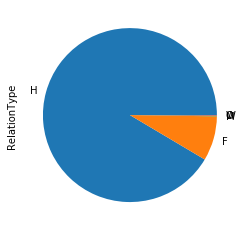

In [100]:
# Blue Colour Represents Married Women
# Orange and other colours except blue represents unmarried women
ax = unmarried_df_percentage.plot(kind='pie', y = 'Surname Analysis')


# Q10 Unique Phone Number Count

In [47]:
all_phone = df.loc[:, ['ContactNo']]
uni_phone = all_phone.groupby(['ContactNo']).agg({'ContactNo':['count']})
uni_phone.columns=['UniqueNo']
uni_phone = uni_phone.reset_index()
uni_phone

,ContactNo,UniqueNo
0,0.000000e+00,4113
1,9.100000e+01,558
2,1.820000e+02,28
3,2.730000e+02,4
4,4.550000e+02,1
...,...,...
12901,9.160000e+11,171
12902,9.170000e+11,437
12903,9.180000e+11,784
12904,9.190000e+11,1050


# Q11 Percentage of Family with Phones


In [23]:
family_size2 = df.loc[:, ['PartNo', 'SectionNo','HouseNoEn', 'ContactNo', 'Age']]


contact_df = family_size2.groupby(['PartNo', 'SectionNo', 'HouseNoEn']).apply(lambda df:df[df.ContactNo != False])
contact_df



PartNo  SectionNo HouseNoEn     ContactNo  \
PartNo SectionNo HouseNoEn                                                    
1      1         01-Feb    4           1          1    01-Feb  9.428845e+09   
                           5           1          1    01-Feb  9.879594e+09   
                 01-Jan    1           1          1    01-Jan  9.879594e+09   
                           2           1          1    01-Jan  9.879594e+09   
                           3           1          1    01-Jan  9.879594e+09   
...                                  ...        ...       ...           ...   
100    8         98        92526     100          8        98           NaN   
                           92527     100          8        98           NaN   
                           92528     100          8        98           NaN   
       9         97        92529     100          9        97  9.976625e+09   
                           92530     100          9        97           NaN   

                                  Age  
PartNo SectionNo HouseNoEn             
1      1         01-Feb    4       38  
                           5       36  
                 01-Jan    1       68  
                           2       63  
                           3       36  
...                               ...  
100    8         98        92526   20  
                           92527   24  
                           92528   26  
       9         97        92529   34  
                           92530   31  

[88448 rows x 5 columns]

# Q12 Assembly Data Summary

* Total Number of Males and Females

In [216]:
gender_df = df['Sex'].value_counts()
gender_df


M    49121
F    43450
Name: Sex, dtype: int64

* Total Number Males and Females between Age 18-25

In [217]:
below_25 = df.loc[:, ['PartNo', 'SectionNo','HouseNoEn', 'VoterFirstNameEn', 'VoterLastNameEn', 'Sex', 'Age']]
below25_Females = below_25.groupby(['PartNo', 'SectionNo','Age']).apply(lambda df:df[(df.Age<=25) & (df.Sex == 'F')])
below25_Females

PartNo  SectionNo HouseNoEn VoterFirstNameEn  \
PartNo SectionNo Age                                                       
1      1         20  117         1          1    20-Feb       DEVGUNIBEN   
                     1306        1          1       348          napaben   
                 21  174         1          1        51         ANITABEN   
                 22  100         1          1        18      JYOTSANABEN   
                     119         1          1    20-Feb      JYOTSANABEN   
...                            ...        ...       ...              ...   
100    7         20  92506     100          7        96          LATABEN   
                     92507     100          7        96         KOMALBEN   
                     92523     100          7        97     CHANDRIKABEN   
                 21  92520     100          7        97        rasilaben   
                 23  92508     100          7        96        NAYANABEN   

                           VoterLastNameEn Sex  Age  
PartNo SectionNo Age                                 
1      1         20  117            PANSAL   F   20  
                     1306         majirana   F   20  
                 21  174         CHAUDHARY   F   21  
                 22  100            PANSAL   F   22  
                     119            PANSAL   F   22  
...                                    ...  ..  ...  
100    7         20  92506         SOLANKI   F   20  
                     92507         SOLANKI   F   20  
                     92523         SOLANKI   F   20  
                 21  92520         solanki   F   21  
                 23  92508         SOLANKI   F   23  

[6510 rows x 7 columns]

In [218]:
below25_Males = below_25.groupby(['PartNo', 'SectionNo','Age']).apply(lambda df:df[(df.Age<=25) & (df.Sex == 'M')])
below25_Males

PartNo  SectionNo HouseNoEn VoterFirstNameEn  \
PartNo SectionNo Age                                                       
1      1         19  1303        1          1         8        PARASBHAI   
                 21  18          1          1    Apr-34      ARAVINDBHAI   
                     43          1          1         9      DEVARAJBHAI   
                     52          1          1        10        vipulbhai   
                     80          1          1    16-Jan       BHARATBHAI   
...                            ...        ...       ...              ...   
100    7         24  92518     100          7        97       GIRISHBHAI   
                 25  92504     100          7        ૯૬        ASHOKBHAI   
                     92505     100          7        ૯૬        KIRANBHAI   
       8         20  92526     100          8        98      VIRBHANBHAI   
                 24  92527     100          8        98       GOVINDBHAI   

                           VoterLastNameEn Sex  Age  
PartNo SectionNo Age                                 
1      1         19  1303           PANSAL   M   19  
                 21  18             PANSAL   M   21  
                     43             PANSAL   M   21  
                     52            panshal   M   21  
                     80             PANSAL   M   21  
...                                    ...  ..  ...  
100    7         24  92518         SOLANKI   M   24  
                 25  92504         SOLANKI   M   25  
                     92505         SOLANKI   M   25  
       8         20  92526            KOLI   M   20  
                 24  92527          THAKOR   M   24  

[10213 rows x 7 columns]

* Senior Citizen

In [36]:
above_60 = df.loc[:, ['PartNo', 'SectionNo','HouseNoEn', 'VoterFirstNameEn', 'VoterLastNameEn', 'Sex', 'Age']]
below60_Females = above_60.groupby(['PartNo', 'SectionNo','Age']).apply(lambda df:df[(df.Age>60) & (df.Sex == 'F')])
below60_Females


PartNo  SectionNo HouseNoEn VoterFirstNameEn  \
PartNo SectionNo Age                                                       
1      1         61  20          1          1         5          TARIBEN   
                 63  2           1          1    01-Jan          SITABEN   
                     70          1          1        15          SITABEN   
                 66  139         1          1        25          GAGIBEN   
                     160         1          1        33          OKHIBEN   
...                            ...        ...       ...              ...   
100    7         69  92488     100          7        95        VADALIBEN   
                 76  92483     100          7        94          MALUBEN   
                     92495     100          7        96          NANUBEN   
                 81  92510     100          7        97         TRIJABEN   
       8         66  92524     100          8        98         RANGUBEN   

                           VoterLastNameEn Sex  Age  
PartNo SectionNo Age                                 
1      1         61  20             PARMAR   F   61  
                 63  2              PARMAR   F   63  
                     70             PANSAL   F   63  
                 66  139           MAKVANA   F   66  
                     160           MAKVANA   F   66  
...                                    ...  ..  ...  
100    7         69  92488         SOLANKI   F   69  
                 76  92483         SOLANKI   F   76  
                     92495         SOLANKI   F   76  
                 81  92510         SOLANKI   F   81  
       8         66  92524            KOLI   F   66  

[6677 rows x 7 columns]

In [38]:
below60_Males = above_60.groupby(['PartNo', 'SectionNo','Age']).apply(lambda df:df[(df.Age>65) & (df.Sex == 'M')])
below60_Males

PartNo  SectionNo HouseNoEn VoterFirstNameEn  \
PartNo SectionNo Age                                                       
1      1         67  57          1          1        12       AYADANBHAI   
                 68  1           1          1    01-Jan        PUNMABHAI   
                     69          1          1        15       MASHRABHAI   
                 69  138         1          1        25         GOVABHAI   
                 72  159         1          1        33        RAMJIBHAI   
...                            ...        ...       ...              ...   
100    5         70  92436     100          5        88         VIRABHAI   
                 71  92420     100          5        85           JORAJI   
                 74  92406     100          5        83         OKHABHAI   
       6         84  92449     100          6        90      CHHAGANBHAI   
       7         72  92487     100          7        95        PREMABHAI   

                           VoterLastNameEn Sex  Age  
PartNo SectionNo Age                                 
1      1         67  57             PANSAL   M   67  
                 68  1              PARMAR   M   68  
                     69             PANSAL   M   68  
                 69  138           MAKVANA   M   69  
                 72  159           MAKVANA   M   72  
...                                    ...  ..  ...  
100    5         70  92436          BHETOR   M   70  
                 71  92420          BHETOR   M   71  
                 74  92406          BHETOR   M   74  
       6         84  92449         KANERIA   M   84  
       7         72  92487         SOLANKI   M   72  

[3166 rows x 7 columns]

* Population Each Part

In [226]:

population = df.loc[:, ['PartNo','SNo']]
population = population.groupby(['PartNo']).apply(lambda df:df[df.SNo==df.SNo.max()])

population
read_

,,PartNo,SNo
PartNo,,,
1,1310,1,1317
2,2157,2,854
3,2994,3,844
4,4155,4,1168
5,4953,5,852
...,...,...,...
96,88705,96,501
97,89626,97,921
98,90579,98,953


# Q13 Last Name Analysis

In [213]:
Last_Name = df['VoterLastNameEn'].value_counts()
Last_Name

PATEL        7580
RABARI       6910
CHAUDHARI    5195
BHIL         4967
SOLANKI      2630
             ... 
HAPTAR          1
MAYATAR         1
MEWATAR         1
chudee          1
RABNARI         1
Name: VoterLastNameEn, Length: 1537, dtype: int64

In [212]:
Last_Name_percentage = df['VoterLastNameEn'].value_counts(normalize = True)*100
Last_Name_percentage

PATEL        8.191584
RABARI       7.467525
CHAUDHARI    5.614153
BHIL         5.367757
SOLANKI      2.842199
               ...   
HAPTAR       0.001081
MAYATAR      0.001081
MEWATAR      0.001081
chudee       0.001081
RABNARI      0.001081
Name: VoterLastNameEn, Length: 1537, dtype: float64

lastname_percent=df['VoterLastNameEn'].value_counts(normalize=True)*100
lastname_percent

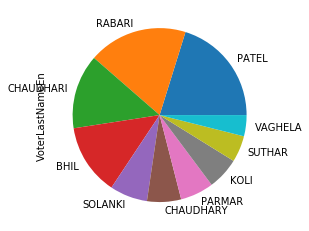

In [215]:
Last_Name_graph = df['VoterLastNameEn'].value_counts().head(10)

ax = Last_Name_graph.plot(kind='pie', y = 'Surname Analysis')

# Q14 Page wise voters (30 voters per page)

In [ ]:
for i in range(len(df)/30):
      print(df.iloc[i:i+30])

    
    
    
    
# i = 0
# i=i+1

# df_1 = df.iloc[i*30:(i+1)*30,:]
# df_1



# df [0:30]

# df_1 = df.iloc[:1000,:]
# df_2 = df.iloc[1000:,:]